In [2]:
#Create a population conflicts visualization for Columbia using Prophet
import pandas as pd
from prophet import Prophet
import numpy as np
import datetime as dt
%matplotlib inline


In [8]:
from google.colab import files
uploaded = files.upload()

Saving conflict_data.csv to conflict_data.csv


In [9]:
conflict_df=pd.read_csv("conflict_data.csv")
conflict_df

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
0,Abkhazia,OWID_ABK,1989,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0
...,...,...,...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0


In [10]:
conflict_df["total_conflict_deaths"] = conflict_df[["One-sided violence", "Non-state", "Intrastate", "Interstate"]].sum(axis=1)
conflict_df


,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0,0


In [11]:
conflict_df.drop(["One-sided violence", "Non-state", "Intrastate", "Interstate"], axis=1, inplace=True)
conflict_df

,Entity,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0
...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0
6966,Zimbabwe,ZWE,2019,0
6967,Zimbabwe,ZWE,2020,0
6968,Zimbabwe,ZWE,2021,0


In [12]:
conflict_df.rename(columns={'Entity': 'Country name'}, inplace=True)
conflict_df.head()

,Country name,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0


In [13]:
conflict_df.dropna(how="any", inplace=True)
conflict_df.head()

,Country name,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0


In [14]:
# Remove Code column
conflict_df.drop(["Code"], axis=1, inplace=True)
conflict_df.head()

,Country name,Year,total_conflict_deaths
0,Abkhazia,1989,0
1,Abkhazia,1990,0
2,Abkhazia,1991,0
3,Abkhazia,1992,0
4,Abkhazia,1993,0


In [16]:
# rename columns for prophet
conflict_df = conflict_df.rename(columns={'Year': 'ds', 'total_conflict_deaths': 'y'})
conflict_df

,Country name,ds,y
0,Abkhazia,1989,0
1,Abkhazia,1990,0
2,Abkhazia,1991,0
3,Abkhazia,1992,0
4,Abkhazia,1993,0
...,...,...,...
6965,Zimbabwe,2018,0
6966,Zimbabwe,2019,0
6967,Zimbabwe,2020,0
6968,Zimbabwe,2021,0


In [17]:
# create prophet object and fit data
prophet_model = Prophet()
prophet_model.fit(conflict_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8gr0p7er/lps5ady_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8gr0p7er/khn8cb1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67776', 'data', 'file=/tmp/tmp8gr0p7er/lps5ady_.json', 'init=/tmp/tmp8gr0p7er/khn8cb1o.json', 'output', 'file=/tmp/tmp8gr0p7er/prophet_model6ry1p72k/prophet_model-20240508022829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:28:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:28:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


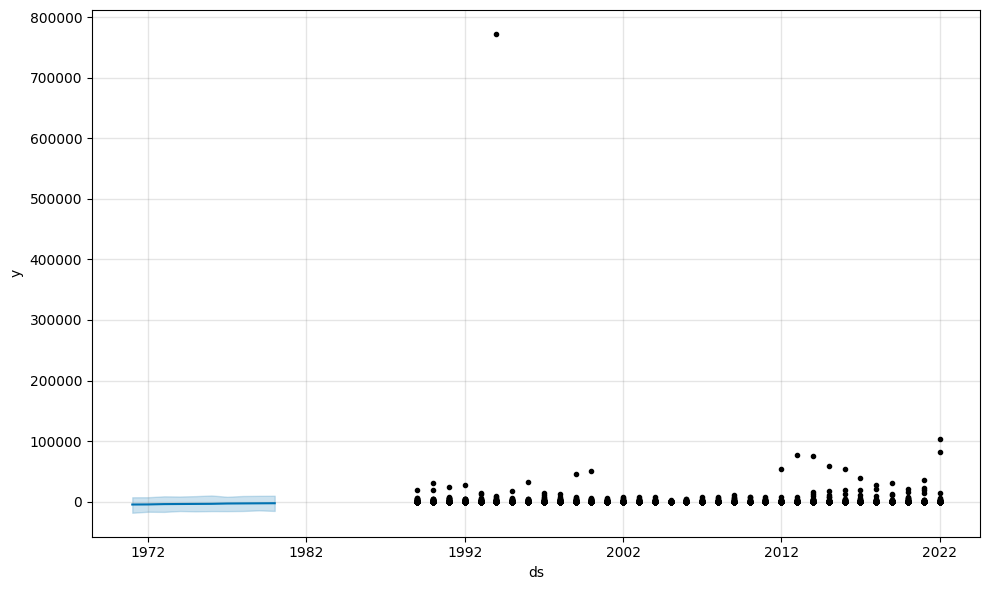

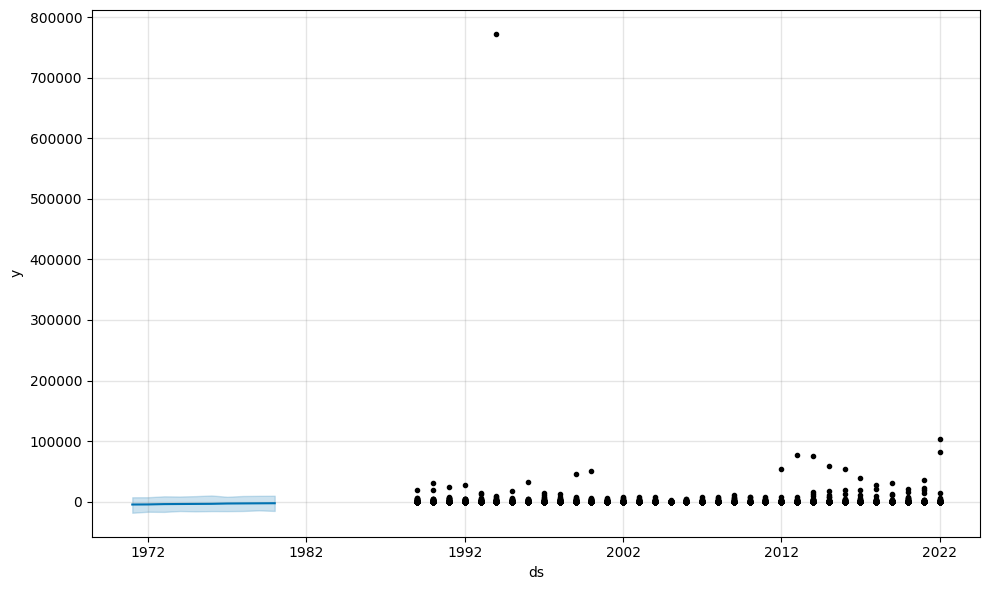

In [19]:
num_years_to_forecast = 10

# Get the minimum and maximum years in the dataset
min_year = conflict_df['ds'].min()
max_year = conflict_df['ds'].max()

# Create a future dataframe for forecasting
future = prophet_model.make_future_dataframe(periods=num_years_to_forecast, freq='Y', include_history=False)
future['ds'] = pd.date_range(start=max_year, periods=num_years_to_forecast, freq='Y')
# Start from the max year in the dataset

# Make predictions
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)